# Re(ad)mindMe

In [9]:
import cv2
from datetime import date
import matplotlib.pyplot as plt
import os
import sys
import easyocr
import torch

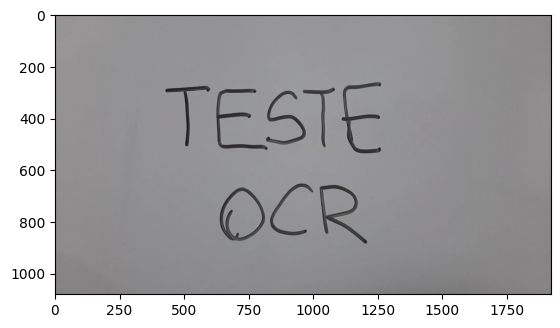

In [10]:
#Caminho do arquivo de imagem
image_path = "Media/2025-06-19.jpg"
image = cv2.imread(image_path)
if image is None:
    print("Erro ao carregar a imagem. Verifique o caminho do arquivo.")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [11]:
if torch.cuda.is_available():
    print("CUDA está disponível. Usando GPU para processamento.")
else:
    print("CUDA não está disponível. Usando CPU para processamento.")

CUDA está disponível. Usando GPU para processamento.


In [ ]:
reader = easyocr.Reader(['pt'], gpu=torch.cuda.is_available())

In [17]:
image_path = "Media/2025-06-19.jpg"
result = reader.readtext(image_path)
result

[([[408, 238], [1302, 238], [1302, 556], [408, 556]],
  'TESTE',
  0.9939883730993019),
 ([[652, 623], [1237, 623], [1237, 894], [652, 894]],
  'OCR',
  0.926105903793271)]

In [24]:
image_path = "Media/2025-06-20.jpg"
result2 = reader.readtext(image_path)
result2

[([[258, 0], [330, 0], [330, 46], [258, 46]], '3', 0.20066428046874663),
 ([[586, 0], [680, 0], [680, 74], [586, 74]], '3', 0.47339045434100413),
 ([[905, 0], [1037, 0], [1037, 99], [905, 99]], '4-', 0.5797929449236177),
 ([[1203, 13], [1313, 13], [1313, 97], [1203, 97]], '5:', 0.9990166870967382),
 ([[143, 78], [377, 78], [377, 193], [143, 193]], 'VLM', 0.9975831707082065),
 ([[1713, 64], [1920, 64], [1920, 161], [1713, 161]],
  'WKNC',
  0.7258783578872681),
 ([[1378, 153], [1687, 153], [1687, 243], [1378, 243]],
  'FREEFORM',
  0.8706579672960045),
 ([[1355, 234], [1595, 234], [1595, 327], [1355, 327]],
  'SUpino',
  0.7386700363191107),
 ([[1338, 340], [1682, 340], [1682, 427], [1338, 427]],
  'TESSERACT',
  0.9948971683928542),
 ([[1394, 417], [1542, 417], [1542, 485], [1394, 485]],
  '@R',
  0.1554829246941942),
 ([[528, 638], [1006, 638], [1006, 814], [528, 814]],
  'TESTE',
  0.9906110154172414),
 ([[633, 837], [962, 837], [962, 994], [633, 994]], 'OCR', 0.8888452687209559),
 (

In [31]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX


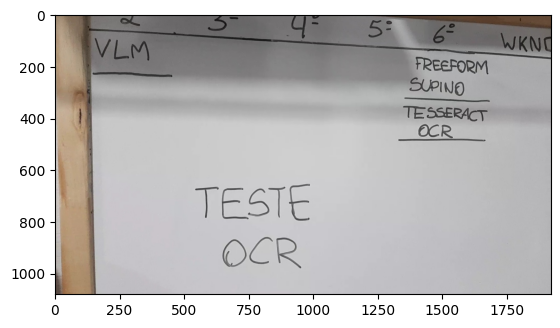

In [32]:
#img = cv2.imread(image_path)
#img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
#img = cv2.putText(img, text, top_left, font, 2, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

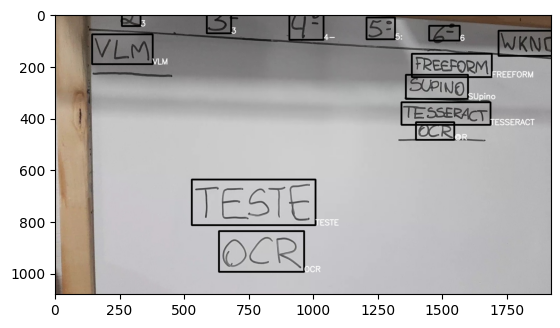

In [37]:
img = cv2.imread(image_path)
for detection in result2:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    img = cv2.rectangle(img, top_left, bottom_right, (0, 0, 0), 5)
    img = cv2.putText(img, text, bottom_right, font, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()